# **GENERACION DE MAPA PERSONALIZADO CON GOOGLE MY MAPS**

Este notebook explica el trabajo de **preprocesamiento y preparación de los datos** para generar la visualización de un mapa personalizado.

Para llevar a cabo esta tarea de manera práctica hemos seleccionado conjuntos de datos de puntos de interés publicados por la Junta de Castilla y León que contienen **información asociada y su geolocalización**.

Pero antes tenemos que realizar una serie de tareas para preparar los datos que posteriormente utilizaremos en la visualización. A continuación, te explicamos cómo lo hacemos.




Pasos que se seguirán para preparar los datos:

1.   Instalación y carga de librerias
2.   Carga de los conjuntos de datos
3. Análisis exploratorio de los datos (EDA)
4. Preprocesamiento de los conjuntos de datos

  4.1 Transformación coordenadas

  4.2 Filtrado de la información

  4.3 Representación gráfica de los conjuntos de datos
  
  4.4 Almacenamiento de las tablas de datos transformadas






Una vez que has iniciado sesión con tu cuenta Gmail, podrás ejecutar cada script o celda de código. Tan solo debes hacer click en el símbolo de la esquina superior izquierda de cada celda con código. El resultado de la ejecución aparecera justo debajo de cada script.

También puedes ejecutar todos los scripts pulsando Ctrl+F9 o eligiendo en el menú superior la opción "Entorno de ejecución" y seleccionando "Ejecutar todas".

# **1. Instalación y carga de librerias**

Lo primero que debemos hacer es instalar las librerías que por defecto, no se encuentran preinstaladas en Google Colaboratory.


In [1]:
# Mediante el comando !pip instalamos las librerías "geopandas" y "utm" 
!pip install geopandas
!pip install utm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 5.2 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for utm: filename

Una vez instaladas las librerias, cargaremos las que vamos a utilizar en el ejercicio.

*   [pandas](https://pandas.pydata.org/) librería especializada en el manejo y análisis de estructuras de datos.
*   [geopandas](https://geopandas.org/en/stable/) librería espacializada en el manejo de datos geográficos.
*   [matplotlib](https://matplotlib.org/) librería usada para crear visualizaciones.
*   [utm](https://pypi.org/project/utm/) paquete para la transformación bidireccional de coordendas UTM - WGS84
*   [warnings](https://docs.python.org/3/library/warnings.html) librería usada para no mostrar los "warnings" del código.

In [2]:
# Cargamos las librerías a utilizar
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import utm
import warnings
warnings.filterwarnings('ignore')

# **2. Carga de los conjuntos de datos**





Cargamos los distintos conjuntos de datos a utilizar en el ejercicio. Estos conjuntos de datos están disponibles en datos.gob.es y son publicados por la Junta de Castilla y León:


*   [Miradores en espacios naturales](https://datos.gob.es/es/catalogo/a07002862-miradores-en-espacios-naturales1)
*   [Observatorios en espacios naturales](https://datos.gob.es/es/catalogo/a07002862-observatorios-en-espacios-naturales1)
*   [Refugios en espacios naturales](https://datos.gob.es/es/catalogo/a07002862-refugios-en-espacios-naturales1)
*   [Arboles singulares en espacios naturales](https://datos.gob.es/es/catalogo/a07002862-arboles-singulares-en-espacios-naturales1)
*   [Casas del parque en espacios naturales](https://datos.gob.es/es/catalogo/a07002862-casas-del-parque-en-espacios-naturales1)
*   [Zonas recreativas en espacios naturales](https://datos.gob.es/es/catalogo/a07002862-zonas-recreativas-en-espacios-naturales1)
*   [Registro de establecimientos hoteleros](https://datosabiertos.jcyl.es/web/jcyl/set/es/turismo/alojamientos_hoteleros/1284211831639)





In [3]:
# Clonamos a Google Colaboratory desde Github el repositorio con los datos de origen que utilizaremos y previamente hemos descargado de datos.gob.es. 
# Una vez clonado, en el menú de la izquierda (Archivos) se generará la carpeta con los conjuntos de datos.
!git clone https://github.com/datosgobes/Laboratorio-de-Datos

Cloning into 'Laboratorio-de-Datos'...
remote: Enumerating objects: 2784, done.
remote: Counting objects: 100% (564/564), done.
remote: Compressing objects: 100% (166/166), done.
remote: Total 2784 (delta 479), reused 440 (delta 395), pack-reused 2220
Receiving objects: 100% (2784/2784), 175.35 MiB | 17.36 MiB/s, done.
Resolving deltas: 100% (1437/1437), done.
Updating files: 100% (233/233), done.


In [4]:
# Introducimos dentro de una lista el nombre de los conjuntos de datos con formato ".shp" 
files = ["arbolPoint", "casa_parquePoint", "miradorPoint", "observatorioPoint", "refugioPoint", "zona_recPoint"]

# Definimos la siguiente función para cargar los datos con formato ".shp" de la carpeta de Github clonada. 
# El objetivo es cargar cada conjunto de datos en una tabla (dataframe)
def carga (df):
  # Entre otras tareas, la librería Geopandas permite cargar datos geográficos con formato ".shp"
  df_final = gpd.read_file("/content/Laboratorio-de-Datos/Visualizaciones/Generacion_mapa_personalizado/Conjunto_datos_origen/" + df + ".shp", encoding="latin1", index=False)
  return(df_final)

# Hacemos una llamada a la función anterior y creamos una tabla para cada uno de los conjuntos de datos .shp de nuestro directorio de trabajo
df_arboles = carga(files[0])
df_casas = carga(files[1])
df_miradores = carga(files[2])
df_observatorios = carga(files[3])
df_refugios = carga(files[4])
df_recreativas = carga(files[5])

In [5]:
# Cargamos el conjunto de datos restante, con formato .csv, haciendo uso de la librería pandas.
df_alojamientos = pd.read_csv("/content/Laboratorio-de-Datos/Visualizaciones/Generacion_mapa_personalizado/Conjunto_datos_origen/registro-de-turismo-de-castilla-y-leon-enriquecido.csv", encoding='utf8', sep=',')


In [6]:
# Puedes comprobar el contenido de cualquiera de las tablas creadas, usando la función head(). Por ejemplo:
df_alojamientos.head()

,establecimiento,num_registro,codigo,tipo,categoria,especialidades,clase,nombre,direccion,cp,...,email,web,q_calidad,central_reservas,posada_real,plazas,longitud,latitud,accesibles_minusvalidos,posicion
0,Turismo Activo,24/000003,NaN,Empresas Turismo Activo D 96/2007,NaN,NaN,NaN,CASA DE LA MONTAÑA,AVIN,33556.0,...,info@casadelamontana.com,www.casadelamontana.com,NaN,NaN,NaN,NaN,-4.906125,43.213387,NaN,"43.213386999058486, -4.906124999999999"
1,Turismo Activo,24/000015,NaN,Empresas Turismo Activo D 96/2007,NaN,NaN,NaN,NAKEL SPORT NATURE,"EL PICO, 9",33560.0,...,info@nakelsport.com,www.nakelsport.com,NaN,NaN,NaN,NaN,-5.533411,42.888068,NaN,"42.8880679990592, -5.533411"
2,Turismo Activo,47/000047,NaN,Profesional de Turismo Activo,NaN,NaN,NaN,BERNARDO MORO MENENDEZ,Calle Rio Somiedo 1 2º C,33840.0,...,bernardomoro@hotmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alojam. Turismo Rural,05/000788,NaN,Casa Rural de Alquiler,3 Estrellas,NaN,NaN,LA SASTRERÍA,Calle VEINTIOCHO DE JUNIO 25,5296.0,...,NaN,www.lasastreriadeadanero.es,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN
4,Alojam. Turismo Rural,05/000696,NaN,Casa Rural de Alquiler,4 Estrellas,NaN,NaN,LAS HAZANAS,Plaza MAYOR 4,5296.0,...,lashazanas@hotmail.com,NaN,NaN,NaN,NaN,8.0,-4.603333,40.943888,NaN,"40.94388809906599, -4.6033331"


#**3. Análisis exploratorio de los datos (EDA)**


Realizamos un análisis exploratorio de los datos donde, por un lado, buscamos detectar anomalías y por otro lado, obtener información de los conjuntos de datos. 



In [7]:
# Generamos una lista con todas las tablas creadas y otra con el nombre de dichas tablas
lista = [df_arboles, df_casas, df_miradores, df_observatorios, df_refugios, df_alojamientos, df_recreativas]
lista_nombres = ["df_arboles", "df_casas", "df_miradores", "df_observatorios", "df_refugios", "df_alojamientos", "df_recreativas"]

# Mediante un bucle for, recorremos conjunto de datos mostrando sus primeras 3 filas 
for i in range(len(lista)):
  print("\n" + lista_nombres[i].upper())
  print(lista[i].head(3))



DF_ARBOLES
   atr_gr_id  atr_gr_tip atr_gr_vis atr_gr_tie atr_gr_ale  equip_a_co  \
0      76222          19          T          T          F  BSFAS00001   
1      76223          19          T          T          ?  BSFAS00002   
2      76224          19          T          T          ?  BSFAS00003   

  equip_a_ob  equip_a_es  equip_a_fe  estado_id  ... cerramient acc_id  \
0        NaN  2010-03-05  2000-07-11          1  ...          1      1   
1        NaN  2010-03-05  2000-07-11          1  ...          1      1   
2        NaN  2010-03-05  2000-07-11          1  ...          1      1   

  acc_dis_id  equip_b_ti  equip_b_su  cerramien0 web  \
0          2           T         0.0           1 NaN   
1          2           T         0.0           1 NaN   
2          1           T         0.0           1 NaN   

                 arbol_nomb  especie_id                        geometry  
0       Eucalipto de Cepeda           1  POINT (242487.020 4482909.180)  
1    Eucalipto del Conven

In [8]:
# Igualmente, podemos, mediante un bucle for, recorrer cada lista mostrando su principal información (número de registros, nombre da cada columna, tipo de dato, etc.) 
for i in range(len(lista)):
  print("\n" + lista_nombres[i].upper())
  print(lista[i].info())



DF_ARBOLES
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   atr_gr_id   94 non-null     int64   
 1   atr_gr_tip  94 non-null     int64   
 2   atr_gr_vis  94 non-null     object  
 3   atr_gr_tie  94 non-null     object  
 4   atr_gr_ale  94 non-null     object  
 5   equip_a_co  94 non-null     object  
 6   equip_a_ob  38 non-null     object  
 7   equip_a_es  94 non-null     object  
 8   equip_a_fe  94 non-null     object  
 9   estado_id   94 non-null     int64   
 10  equip_b_se  94 non-null     object  
 11  equip_b_ac  54 non-null     object  
 12  equip_b_no  92 non-null     object  
 13  cerramient  94 non-null     int64   
 14  acc_id      94 non-null     int64   
 15  acc_dis_id  94 non-null     int64   
 16  equip_b_ti  94 non-null     object  
 17  equip_b_su  94 non-null     float64 
 18  cerramien0  94 non-null     int6

Se ha detectado una anomalía en la tabla de datos **"df_recreativas"**. Revisando el conjunto de datos inicial, se observa
que se incluye un espacio en blanco delante de cada registro en la variable **"geometry"**. A continuación procedemos a solucionarlo.

In [9]:
# Modificamos el tipo de la varible a str y eliminamos el espacio en blanco que hay al principio de cada registro
df_recreativas["geometry"] = df_recreativas["geometry"].astype(str)
df_recreativas["geometry"] = df_recreativas["geometry"].str.lstrip()


Igualmente, la tabla de datos **"df_alojamientos"**, tiene definidas las varibales **"telefono_1"** y **"poblacion municipio"** de tipo float. En cada caso, debemos ajustar al tipo apropiado para el tipo de información que contienen. Concretamente, los valores para la variable "poblacion municipio" pueden ser de tipo int pero en el caso de "telefono_1", lo más apropiado es definirla como de tipo string por si algún valor pudiera contener un formato de teléfono que incluya espacios en blanco o el caracter "+" del prefijo.

A continuación procedemos a solucionar esta incidencia:

In [10]:
# Modificamos el tipo de la varible a "int" eliminando el valor decimal para cada uno de los registros
df_alojamientos = df_alojamientos[df_alojamientos['poblacion municipio'].notna()]
df_alojamientos["poblacion municipio"] = df_alojamientos["poblacion municipio"].astype(int)
df_alojamientos["poblacion municipio"].head()

0    6260
1    5642
2    1100
3     214
4     214
Name: poblacion municipio, dtype: int64

In [11]:
# Modificamos el tipo de la varible a "str" conviertiendo previamente el tipo float a int para eliminar el valor decimal para cada uno de los registros
df_alojamientos = df_alojamientos[df_alojamientos['telefono_1'].notna()]
df_alojamientos["telefono_1"] = df_alojamientos["telefono_1"].astype(int)
df_alojamientos["telefono_1"] = df_alojamientos["telefono_1"].astype(str)
df_alojamientos["telefono_1"].head()

0    985844189
1    609221176
2    616367277
3    920307158
4    655099974
Name: telefono_1, dtype: object

Sustituimos los valores de la varibles en todos las tablas de datos, modificando los registros "F" por "No" y los registros "T" por "Si".




In [12]:
# Modificamos los registros de las variables que sean "F" o "T"
for df in lista:
  df.replace({"T": "Si", "F": "No"}, inplace=True)


#**4. Preprocesamiento de las tablas de datos**

Una vez cargados los conjuntos de datos y realizado el análisis de datos exploratorio, procedemos con los siguientes pasos para obtener las tablas de datos preprocesadas que necesitamos para generar la visualización final. La herramienta para generar la visualización será **"Google My Maps"**

## **4.1 Transformación coordenadas**

Los datos de origen utilizan el estandar europeo ETSR89, concretamente el sistema de referencia **ETRS89 y proyección UTM Huso 30** y el sistema de coordenadas que utiliza **"Google My Maps"** es el **WGS84**, cuyo formato consiste en la representación de dos magnitudes separadas para la **latitud** y **longitud** (Norte y Este en positivo, Sur y Oeste en negativo). Este tipo de transformaciones son habituales cuando se trabaja con información geográfica por lo que debes utilizar alguna herramienta de conversión o codificar usando una función que permita realizar la transformción. En este ejercicio, utilizamos esta última opción.


In [13]:
# Creamos una función para crear dos nuevas columnas: "longuitud" y "latitud" a partir de los valores de la columna "geometry"

def Preprocesamiento(df):
  # Adecuamos los valores de la variable "geometry" para poder reemplazarlos por valores de longitud y latitud
  df["geometry"] = df["geometry"].astype(str)
  df["geometry"] = df["geometry"].str.replace("POINT ", "").str.replace("(", "").str.replace(")", "")
  # Creamos dos nuevas variables "utm30_x" y "utm30_y" con la información geográfica 
  df[["utm30_x", "utm30_y"]]= df["geometry"].str.split(" ", expand=True).astype(float)
  # Mediante un bucle for recorremos la tabla de datos
  for i in range(len(df['utm30_x'])):
    # Transformamos los valores de las varibles "utm30_x" y "utm30_y" en variables de "longitud" y "latitud"
    vector = utm.to_latlon(df['utm30_x'][i], df['utm30_y'][i], 30, 'N')
    df['utm30_x'][i] = vector[0]
    df['utm30_y'][i] = vector[1]
  # Renombramos las variables
  df = df.rename(columns= {"utm30_x": "latitud",'utm30_y':'longitud'})
  # Devolvemos la tabla una vez realizados todos los ajustes
  return(df)

#Hacemos llamada a la función definida anteriomente para las distintas tablas de datos
df_final_arboles = Preprocesamiento(df_arboles)
df_final_casas = Preprocesamiento(df_casas)
df_final_miradores = Preprocesamiento(df_miradores)
df_final_refugios = Preprocesamiento(df_refugios)
df_final_observatorios = Preprocesamiento(df_observatorios)
df_final_recreativas = Preprocesamiento(df_recreativas) 

En segundo lugar transformamos la tabla de datos .csv. Esta tabla ya tiene las coordenas en formato  **WGS84** (latitud y longitud), por lo que no precisa transformación

In [14]:
# Separamos los valores de latitud y longitud en dos variables independientes
df_alojamientos["posicion"] = df_alojamientos["posicion"].str.replace(",", "")
df_alojamientos[["latitud", "longitud"]]= df_alojamientos["posicion"].str.split(" ", expand=True).astype(float)
df_final_alojamientos = df_alojamientos


## **4.2 Filtrado de la información**

A continuación, **personalizaremos la información que queremos mostrar** en la visualización de cada una de las tablas de datos. 

Para ellos realizaremos diversas tareas de filtrado, cambio de nombre de variables, búsqueda de variables sin valores, ... 

In [15]:
# En la tabla de datos "df_arboles", filtramos quedandonos con las varariables que nos interesan y las renombramos
df_final_arboles = df_final_arboles[["arbol_nomb", "equip_a_ob", "equip_b_ac","equip_b_se","latitud", "longitud"]]
df_final_arboles = df_final_arboles.rename(columns= {"arbol_nomb": "nombre",'equip_a_ob':'observaciones', 'equip_b_se':'señalizacion externa', "equip_b_ac":"acceso"})
# Visualizamos las primeras filas  
df_final_arboles.head()

,nombre,observaciones,acceso,señalizacion externa,latitud,longitud
0,Eucalipto de Cepeda,NaN,NaN,Si,40.456972,-6.036913
1,Eucalipto del Convento,NaN,NaN,Si,40.461540,-6.143153
2,Roble de Nava de Francia,NaN,NaN,Si,40.540401,-6.113440
3,Haya de Herguijuela,Adscrito al Catálogo de Árboles Singulares de ...,NaN,Si,40.453115,-6.078149
4,Pino de la Alberca,NaN,NaN,Si,40.459442,-6.136251


In [16]:
# En la tabla de datos "df_casas", filtramos quedandonos con las varariables que nos interesan y las renombramos
df_final_casas = df_final_casas[["equip_b_no", "equip_b_ac", "equip_a_ob","equip_b_se", "web","latitud", "longitud"]]
df_final_casas = df_final_casas.rename(columns= {"equip_b_no": "nombre",'equip_a_ob':'observaciones', 'equip_b_se':'señalizacion externa', "equip_b_ac":"acceso"})
# Visualizamos las primeras filas 
df_final_casas.head()

,nombre,acceso,observaciones,señalizacion externa,web,latitud,longitud
0,Casa del Parque del Acebal,Calle urbana de Arévalo de la Sierra.,En construcción. Fecha prevista de funcionamie...,Si,http://www.miespacionatural.es,41.947157,-2.400284
1,Casa del Parque Convento de San Francisco,En el núcleo urbano de Fermoselle.,NaN,Si,http://www.miespacionatural.es,41.315273,-6.398523
2,Casa del Parque El Torreón de Sobradillo,"Se sitúa en el núcleo urbano de Sobradillo, lo...",NaN,Si,http://www.miespacionatural.es,40.917675,-6.799337
3,Casa del Parque Las Batuecas-Sierra de Francia,La Casa se sitúa en el núcleo urbano de La Alb...,CIF: S-4711001-J,Si,http://www.miespacionatural.es/espaciospanel/2...,40.488068,-6.116092
4,Casa del Parque del Cañón de Río Lobos,Punto de información situado en la entrada de ...,"Instalaciones en rehabilitación, instalación p...",Si,http://www.miespacionatural.es/espaciospanel/2...,41.721856,-3.047414


In [17]:
# En la tabla de datos "df_miradores", filtramos quedandonos con las varariables que nos interesan y las renombramos
df_final_miradores = df_final_miradores[["equip_b_no", "equip_b_ac", "equip_a_ob","equip_b_se","latitud", "longitud"]]
df_final_miradores = df_final_miradores.rename(columns= {"equip_b_no": "nombre",'equip_a_ob':'observaciones', 'equip_b_se':'señalizacion externa', "equip_b_ac":"acceso"})
# Visualizamos las primeras filas  
df_final_miradores.head()

,nombre,acceso,observaciones,señalizacion externa,latitud,longitud
0,Mirador del Acebal,Entrada principal del Acebal,"Mirador adaptado, con sendero practicable, a 2...",Si,41.965043,-2.421006
1,Mirador de la Ribera del Pontón (Villardiegua ...,Se accede por un camino que parte desde Villar...,NaN,Si,41.530298,-6.225073
2,Mirador de las Escaleras (Fermoselle),Se accede por un camino que parte desde Fermos...,NaN,Si,41.314459,-6.430443
3,Mirador de la Peña del Cura (Pinilla de Fermos...,Se accede directamente desde una calle del cas...,NaN,Si,41.368853,-6.382417
4,Mirador de las Barrancas,Se accede por un camino-sendero que parte desd...,NaN,Si,41.440170,-6.289982


In [18]:
# En la tabla de datos "df_observatorios", filtramos quedandonos con las varariables que nos interesan y las renombramos
df_final_observatorios = df_final_observatorios[["equip_b_no", "equip_b_ac", "equip_a_ob","equip_b_se","latitud", "longitud"]]
df_final_observatorios = df_final_observatorios.rename(columns= {"equip_b_no": "nombre",'equip_a_ob':'observaciones', 'equip_b_se':'señalizacion externa', "equip_b_ac":"acceso"})
# Visualizamos las primeras filas 
df_final_observatorios.head()

,nombre,acceso,observaciones,señalizacion externa,latitud,longitud
0,Observatorio de aves de Saucelle,Pista,NaN,Si,41.193413,-6.671075
1,Observatorio de aves de Aldeadávila,Pista,NaN,Si,41.034633,-6.763018
2,Punto de información y observación fauna,Entrada de La Fuentona,Se trata de un antiguo refugio de pescadores c...,Si,41.731312,-2.858502
3,Observatorio Astronómico de La Lora,Está sirtuado en el páramo de Lora en rebollar...,Con calendario de visitas. Pertenece a Cantabria.,No,42.770590,-3.944963
4,Observatorio del Valle Valderredible,Está sirtuado en el páramo de Lora en rebollar...,Con cartel informativo en forma de mesa inclin...,No,42.770763,-3.944070


In [19]:
# En la tabla de datos "df_refugios", filtramos quedandonos con las varariables que nos interesan y las renombramos
df_final_refugios = df_final_refugios[["equip_b_no", "equip_b_ac", "equip_a_ob","equip_b_se","latitud", "longitud"]]
df_final_refugios = df_final_refugios.rename(columns= {"equip_b_no": "nombre",'equip_a_ob':'observaciones', 'equip_b_se':'señalizacion externa', "equip_b_ac":"acceso"})
# Filtramos eliminando los registros cuya varible "observaciones" este vacía
df_final_refugios = df_final_refugios[df_final_refugios['observaciones'].notna()]
# Visualizamos las primeras filas  
df_final_refugios.head()

,nombre,acceso,observaciones,señalizacion externa,latitud,longitud
0,Refugio del Pastor,NaN,Refugio de 20x20m adosado a la taina,No,41.975944,-2.421691
4,Costalago,Pista forestal desde Hontoria del Pinar y desd...,Tiene cerca una fuente,No,41.811597,-3.175328
5,Fuente del Pino,Pista forestal desde Santa María de las Hoyas,Tiene cerca una fuente,No,41.790157,-3.138683
9,Refugio del Cristo Sierra,NaN,Refugio de piedra con dos estancias: una capil...,No,42.851351,-4.741301
10,Refugio de Santa Marina,NaN,"Refugio de montaña construído en piedra, en un...",No,42.974277,-4.606141


In [20]:
# En la tabla de datos "df_recreativas", filtramos quedandonos con las variables que nos interesan y las renombramos
df_final_recreativas = df_final_recreativas[["equip_b_no", "equip_b_ac", "equip_a_ob","equip_b_se", "web","latitud", "longitud"]]
df_final_recreativas = df_final_recreativas.rename(columns= {"equip_b_no": "nombre",'equip_a_ob':'observaciones', 'equip_b_se':'señalizacion externa', "equip_b_ac":"acceso"})
# Filtramos eliminando los registros cuyas varibles "observaciones" y "acceso" esten vacías
df_final_recreativas = df_final_recreativas[df_final_recreativas['observaciones'].notna()]
df_final_recreativas = df_final_recreativas[df_final_recreativas['acceso'].notna()]
# Visualizamos las primeras filas 
df_final_recreativas.head()

,nombre,acceso,observaciones,señalizacion externa,web,latitud,longitud
0,Área Recreativa de La Fuentona,"A las afueras de Torrearevalo, en la pista al ...",Propuesta de Fundación Patrimonio Natural pend...,Si,NaN,41.960257,-2.392390
39,Área natural de Los Navazos,Pista,"No dispone de infraestructura de uso público, ...",Si,NaN,41.158192,-6.651336
41,Merendero de Saucelle,Carretera,Se colocaron unas mesas de piedra en un área (...,No,NaN,41.052627,-6.753663
43,Parque municipal de Cerezal de Peñahorcada,Carretera,Se realizó un acondicionamiento por parte del ...,No,NaN,41.129590,-6.653310
45,Entorno de la ermita de La Peña,Carretera,Se acondicionó colocando unos bancos de piedra,No,NaN,41.174145,-6.521265


Observa que la tabla **"df_alojamientos"** incluye dos columnas de datos que originalmente no estaban en los conjuntos de origen, "wikidata" e "imagen municipio". Estas dos columnas de datos son el resultado del ejercicio de enriquecimiento de esta tabla que hemos realizado usando **OpenRefine**. Recuerda que se explica en el post que acompaña este ejercicio.

In [21]:
# En la tabla de datos "df_alojamientos", filtramos quedandonos con las varariables que nos interesan
df_final_alojamientos = df_final_alojamientos[['establecimiento', 'tipo','categoria', 'nombre', 'municipio', 'web', 'telefono_1', 'wikidata', 'imagen municipio', 'poblacion municipio', 'longitud', 'latitud']]
df_final_alojamientos = df_final_alojamientos.rename(columns= {"telefono_1": "telefono"})
# Filtramos quedandonos con los registros cuya variable "establecimiento" sea igual a "Aloj. Turismo Rural"
df_final_alojamientos = df_final_alojamientos[df_final_alojamientos['establecimiento'] == "Alojam. Turismo Rural"]
# Filtramos quedandonos con los registros cuya variable "categoria" sea igual a "2 estrellas"
df_final_alojamientos = df_final_alojamientos[df_final_alojamientos["categoria"] == "2 Estrellas"]
# Filtramos eliminando los registros cuyas varibles de posición esten vacías
df_final_alojamientos = df_final_alojamientos[df_final_alojamientos['longitud'].notna()]
# Visualizamos las primeras filas 
df_final_alojamientos.head()

,establecimiento,tipo,categoria,nombre,municipio,web,telefono,wikidata,imagen municipio,poblacion municipio,longitud,latitud
16,Alojam. Turismo Rural,Casa Rural de Alquiler,2 Estrellas,LOS ABUELOS,La Adrada,NaN,630982862,http://www.wikidata.org/entity/Q1606366,https://www.wikidata.org/wiki/Q1606366#/media/...,2750,-4.619777,40.301296
18,Alojam. Turismo Rural,Casa Rural,2 Estrellas,EL PAJAR DE LA ADRADA,La Adrada,NaN,609151712,http://www.wikidata.org/entity/Q1606366,https://www.wikidata.org/wiki/Q1606366#/media/...,2750,-4.635890,40.299530
20,Alojam. Turismo Rural,Casa Rural de Alquiler,2 Estrellas,CONCEJO I,La Adrada,NaN,920206204,http://www.wikidata.org/entity/Q1606366,https://www.wikidata.org/wiki/Q1606366#/media/...,2750,-4.636681,40.300514
21,Alojam. Turismo Rural,Casa Rural de Alquiler,2 Estrellas,CONCEJO II,La Adrada,NaN,920206204,http://www.wikidata.org/entity/Q1606366,https://www.wikidata.org/wiki/Q1606366#/media/...,2750,-4.636681,40.300514
22,Alojam. Turismo Rural,Casa Rural,2 Estrellas,EL REFUGIO DE LUCAS,La Adrada,NaN,616846546,http://www.wikidata.org/entity/Q1606366,https://www.wikidata.org/wiki/Q1606366#/media/...,2750,-4.637017,40.298022


## **4.3 Representación gráfica de los conjuntos de datos**

A continuación **dibujaremos sobre el mapa nacional los puntos georreferenciados** de las distintas tablas de datos una vez preprocesadas. 

De esta forma podremos hacer una **rápida comprobación** antes de introducir los conjuntos de datos en la herramienta de visualización y generar el mapa.

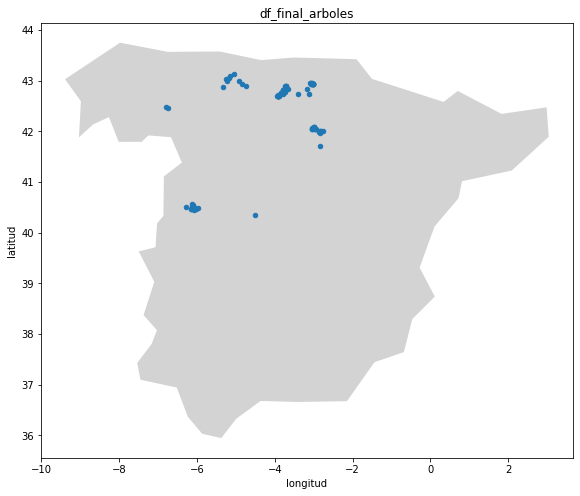

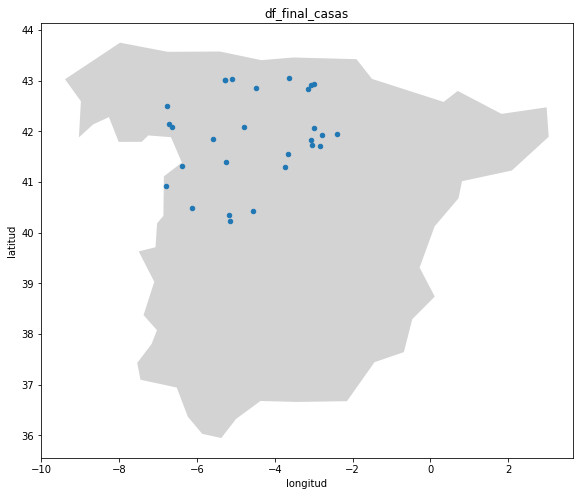

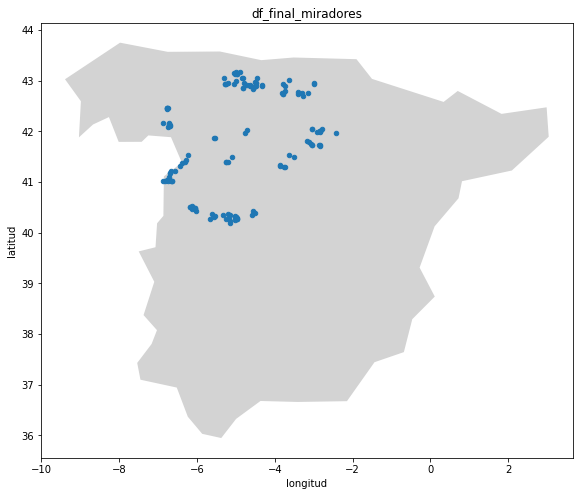

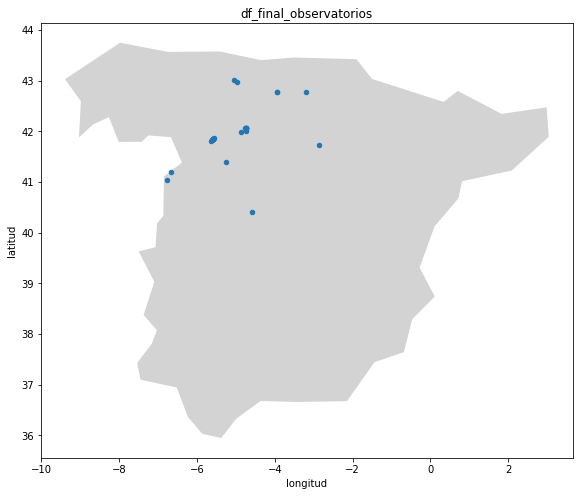

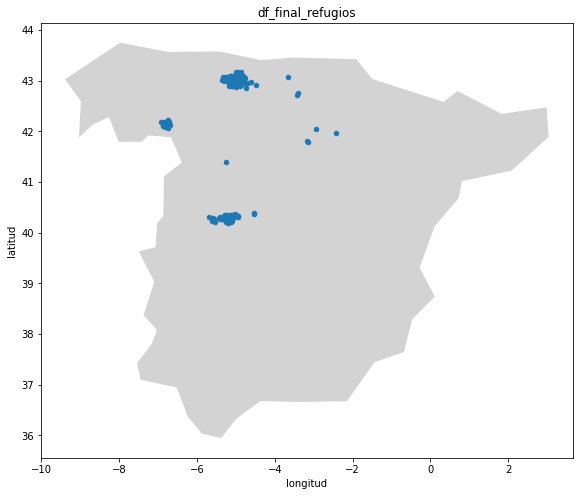

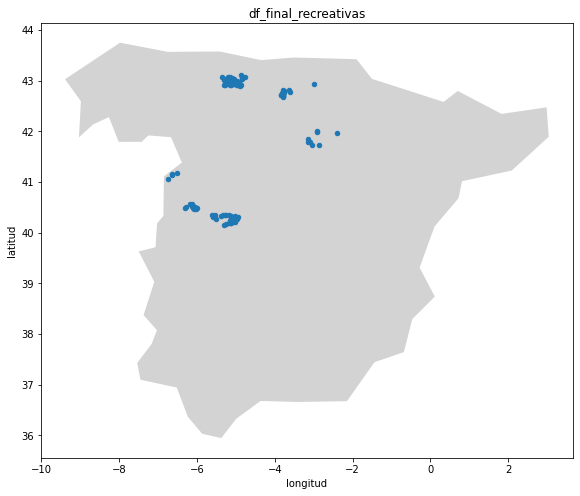

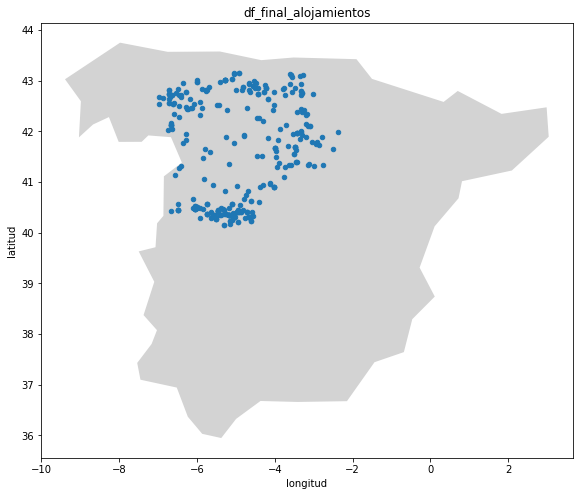

In [22]:
# Cargamos el conjunto de datos con la geometría de los distintos paises que se encuentra disponible dentro de la librería "geopandas"
paises = gpd.read_file(  gpd.datasets.get_path("naturalearth_lowres"))
# Filtramos para quedarnos con la geometría de España
paises = paises[paises["name"] == "Spain"]
# Generamos una lista con todas las tablas de datos una vez preprocesadas y otra lista con los nombres de dichas tablas de datos
lista = [df_final_arboles, df_final_casas, df_final_miradores, df_final_observatorios, df_final_refugios, df_final_recreativas, df_final_alojamientos]
lista_nombres = ["df_final_arboles", "df_final_casas", "df_final_miradores", "df_final_observatorios", "df_final_refugios", "df_final_recreativas", "df_final_alojamientos"]

# Creamos una función para representar sobre el mapa de España los puntos georeferenciados de cada una de las tablas de datos.
def ploteado(df):
  # Generamos la figura con el tamaño deseado.
  fig, ax = plt.subplots(figsize=(10,8))
  # Dibujamos el mapa con la geometría de España.
  paises.plot(color="lightgrey", ax=ax)
  # Dibujamos los puntos georreferenciados de la tabla de datos sobre el mapa con la geometría de España, añadimos el título de la figura y la mostramos.
  df.plot(x="longitud", y="latitud", kind="scatter",ax=ax)
  plt.title(lista_nombres[i])
  plt.show()
  print("\n")

# Mediante un bucle for, hacemos llamada a la función de ploteado para todas las tablas de datos preprocesadas que hemos introducido en la variable lista
for i in range(len(lista)):
  ploteado(lista[i])


## **4.4 Almacenamiento de las tablas de datos transformadas**

Guardamos las tablas de datos preprocesadas en formato .csv

In [23]:
# Guardado de las tablas de datos en formato .csv
df_final_recreativas.to_csv("recreativas_parques_naturales.csv", encoding="utf8", index=False)
df_final_alojamientos.to_csv("alojamientos_rurales_2estrellas.csv", encoding="latin", index=False)
df_final_refugios.to_csv("refugios_parques_naturales.csv", encoding="utf8", index=False)
df_final_observatorios.to_csv("observatorios_parques_naturales.csv", encoding="utf8", index=False)
df_final_miradores.to_csv("miradores_parques_naturales.csv", encoding="utf8", index=False)
df_final_casas.to_csv("casas_del_parque.csv", encoding="utf8", index=False)
df_final_arboles.to_csv("arboles_parques_naturales.csv", encoding="utf8", index=False)

Una vez ejecutadas todas las celdas, aparecerán en el menú de la izquierda de la interfaz, en la carpeta de archivos, las tablas de datos preprocesadas  que utilizaremos en la visualización del mapa.

Haciendo click sobre cada una de ellas podremos descargarlas de forma sencilla. No obstante, estas tablas también están recogidas en el siguiente repositorio de Github.